## **The Bandit Problem**

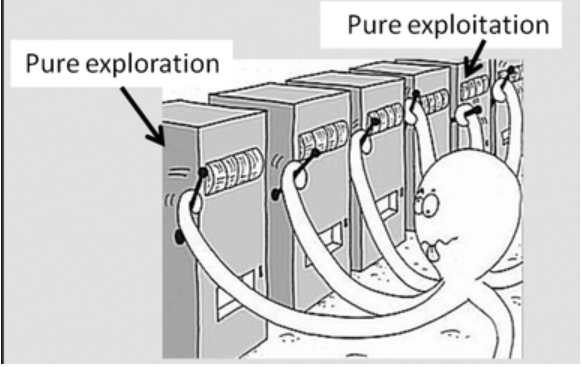

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy.random import normal as GaussianDistribution

In [ ]:
# Define the armed bandit variables
nB = 2000 # Number of bandits
nS = 10000 # Number of steps we will take for each bandit
nA = 10 # Number of arms or actions of the bandit
nT = 2 # Number of solutions we would apply

In [ ]:
# Defining the rewards container
rewards = np.full((nT, nB, nS), fill_value=0.)
# Defining the optimal selection container
optimal_selections = np.full((nT, nB, nS), fill_value=0.)
print('Rewards tracker shape',rewards.shape)
print('Optimal reward tracker shape',optimal_selections.shape)

Rewards tracker shape (2, 2000, 10000)
Optimal reward tracker shape (2, 2000, 10000)


In [ ]:
# Set the initial values of our actions (Qt(a) )
action_Mental_model = np.full(nA, fill_value=0.0) 
print(action_Mental_model.shape)
action_Mental_model

(10,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Initialize the bandit calibration values : For non stationary reward
arm_caliberated_value = np.full(nA, fill_value=0.0) 
arm_caliberated_value

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Initialize the count of how many times an action was selected
arm_selected_count = np.full(nA, fill_value=0, dtype="int64") 
arm_selected_count

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Define the epsilon (ε) value 
epsilon=0.1

In [ ]:
# First determine whether we need to explore or exploit
probability = np.random.rand()
probability

0.301474640255731

In [ ]:
# Our decision mechanism
if probability >= epsilon:
  my_action = np.argmax(action_Mental_model)
else:
  my_action = np.random.choice(nA)
print('Selected Action',my_action)

Selected Action 0


In [ ]:
# Find the most optimal arm of the bandits based on its internal calibration calculations
optimal_calibrated_arm = np.argmax(arm_caliberated_value)
optimal_calibrated_arm

0

In [ ]:
# Find the value corresponding to the most optimal calibrated arm
optimal_calibrated_value = arm_caliberated_value[optimal_calibrated_arm]
optimal_calibrated_value

0.0

In [ ]:
# Check whether the value corresponding to action selected by the user and the internal optimal action value are same.
optimal_pull = float(optimal_calibrated_value == arm_caliberated_value[my_action])
optimal_pull

1.0

In [ ]:
# Calculate the reward which is a random distribution centred at the selected action value
reward = GaussianDistribution(loc=arm_caliberated_value[my_action], scale=1, size=1)[0]
reward

0.7497978053119215

In [ ]:
# Update the arm selected count by 1
arm_selected_count[my_action] += 1
arm_selected_count

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Get the current value of our action
Vcur = action_Mental_model[my_action]
Vcur

0.0

In [ ]:
# Get the count of the number of times the arm was exploited
n = arm_selected_count[my_action]
n

1

In [ ]:
# Update the new value for the selected action
action_Mental_model[my_action] = Vcur + (1/n) * (reward - Vcur)
action_Mental_model

array([0.74979781, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
# Increment the calibration value based on a Gaussian distribution
increment = GaussianDistribution(loc=0, scale=0.01, size=nA)
# Update the arm values with the updated value
arm_caliberated_value += increment
# Updated arm value
arm_caliberated_value

array([-0.01083453,  0.00572083, -0.01213052, -0.00161952,  0.00246208,
        0.01681666,  0.00515234, -0.01248177, -0.01084042, -0.00660715])

In [ ]:
def Myaction(epsilon,action_Mental_model):
    probability = np.random.rand()
    if probability >= epsilon:
        return np.argmax(action_Mental_model)

    return np.random.choice(nA)

In [ ]:
def Optimalaction_reward(my_action,arm_caliberated_value):
  # Find the most optimal arm of the bandits based on its internal calibration calculations
  optimal_calibrated_arm = np.argmax(arm_caliberated_value)
  # Then find the value corresponding to the most optimal calibrated arm
  optimal_calibrated_value = arm_caliberated_value[optimal_calibrated_arm]
  # Check whether the value of the test bed corresponding to action selected by the user and the internal optimal action value of the test bed are same.
  optimal_pull = float(optimal_calibrated_value == arm_caliberated_value[my_action])
  # Calculate the reward which is a random distribution centred at the selected action value
  reward = GaussianDistribution(loc=arm_caliberated_value[my_action], scale=1, size=1)[0]
  return optimal_pull,reward

In [ ]:
def updateMental_model(my_action, reward,arm_selected_count,action_Mental_model):
  # Update the arm selected count with the latest count
  arm_selected_count[my_action] += 1
  # find the current value of the arm selected
  Vcur = action_Mental_model[my_action]
  # Find the number of times the arm was pulled
  n = arm_selected_count[my_action]
  # Update the value of the current arm 
  action_Mental_model[my_action] = Vcur + (1/n) * (reward - Vcur)
  # Return the arm selected and our mental model
  return arm_selected_count,action_Mental_model

In [ ]:
def calibrateArm(arm_caliberated_value):
    increment = GaussianDistribution(loc=0, scale=0.01, size=nA)
    arm_caliberated_value += increment
    return arm_caliberated_value

In [ ]:
for nB_i in tqdm(range(nB)):
  # Initialize the calibration values for the bandits
  arm_caliberated_value = np.full(nA, fill_value=0.0)
  # Set the initial values of the mental model for each bandit
  action_Mental_model = np.full(nA, fill_value=0.0)
  # Initialize the count of how many times an arm was selected
  arm_selected_count = np.full(nA, fill_value=0, dtype="int64")
  # Define the epsilon value for probability of exploration
  epsilon=0.1
  for nS_i in range(nS):
    # First select an action using the helper function
    my_action = Myaction(epsilon,action_Mental_model)
    # Check whether the action is optimal and calculate the reward
    optimal_pull,reward = Optimalaction_reward(my_action,arm_caliberated_value)
    # Update the mental model estimates with the latest action selected and also the reward received
    arm_selected_count,action_Mental_model = updateMental_model(my_action, reward,arm_selected_count,action_Mental_model)
    # store the rewards
    rewards[0][nB_i][nS_i] = reward
    # Update the optimal step selection counter
    optimal_selections[0][nB_i][nS_i] = optimal_pull
    # Recalibrate the bandit values
    arm_caliberated_value = calibrateArm(arm_caliberated_value)

100%|██████████| 2000/2000 [08:31<00:00,  3.91it/s]


In [ ]:
rewards.shape

(2, 2000, 10000)

In [ ]:
# Averaging the rewards for all the bandits along the number of steps taken
avgRewards = np.average(rewards[0], axis=0)
avgRewards.shape

(10000,)

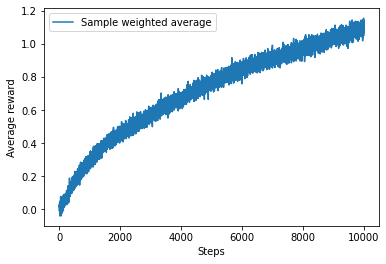

In [ ]:
plt.plot(avgRewards, label='Sample weighted average')
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.show()

In [ ]:
# Average rewards received by each arm
action_Mental_model

array([-1.01634593,  0.40458415, -0.60594572, -0.33539796, -0.00286706,
        0.0227804 ,  1.00328106,  0.33710934,  0.12244723,  1.62354918])

In [ ]:
# No of times each arm was pulled
arm_selected_count

array([ 103,  152,   95,  112,  505,  818,  127,  103, 1279, 6706])

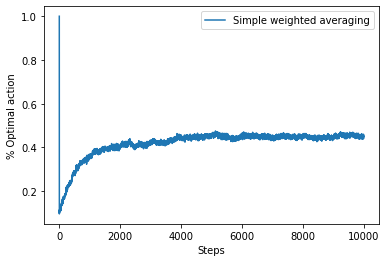

In [ ]:
# Plot of the most optimal actions 
average_run_optimality = np.average(optimal_selections[0], axis=0)
average_run_optimality.shape
plt.plot(average_run_optimality, label='Simple weighted averaging')
plt.legend()
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.show()

###**Weighted Averaging Method**

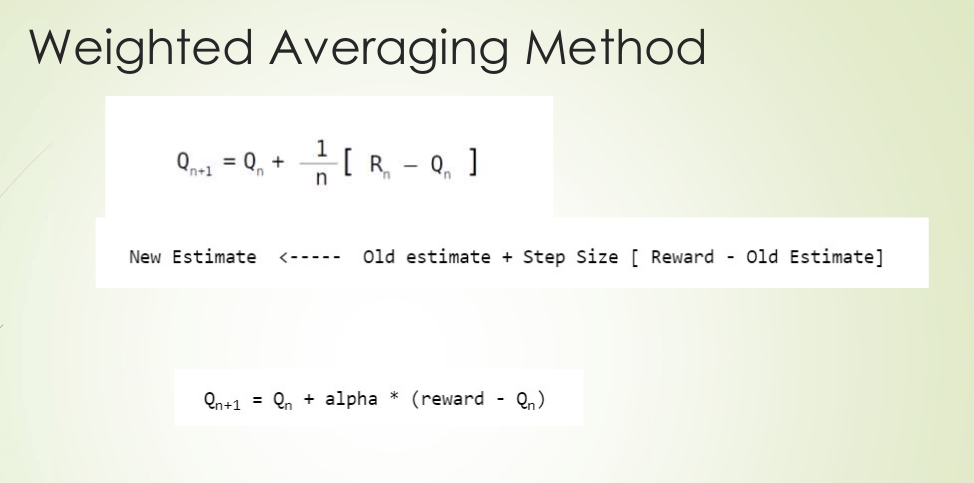

In [ ]:
def updateMental_model_WA(my_action, reward,action_Mental_model):
  alpha=0.1 
  qn = action_Mental_model[my_action]
  action_Mental_model[my_action] = qn + alpha * (reward - qn)
  return action_Mental_model

In [ ]:
for nB_i in tqdm(range(nB)):
  # Initialize the calibration values for the bandits
  arm_caliberated_value = np.full(nA, fill_value=0.0)
  # Set the initial values of the mental model for each bandit
  action_Mental_model = np.full(nA, fill_value=0.0)  
  # Define the epsilon value for probability of exploration
  epsilon=0.1
  for nS_i in range(nS):
    # First select an action using the helper function
    my_action = Myaction(epsilon,action_Mental_model)
    # Check whether the action is optimal and calculate the reward
    optimal_pull,reward = Optimalaction_reward(my_action,arm_caliberated_value)
    # Update the mental model estimates with the latest action selected and also the reward received
    action_Mental_model = updateMental_model_WA(my_action, reward,action_Mental_model)
    # store the rewards
    rewards[1][nB_i][nS_i] = reward
    # Update the optimal step selection counter
    optimal_selections[1][nB_i][nS_i] = optimal_pull
    # Recalibrate the bandit values
    arm_caliberated_value = calibrateArm(arm_caliberated_value)

100%|██████████| 2000/2000 [08:01<00:00,  4.15it/s]


(10000,)


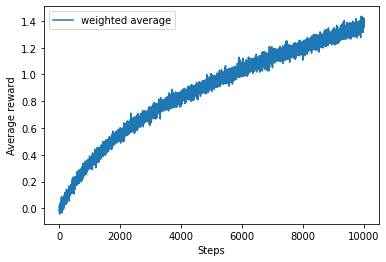

In [ ]:
average_run_rewards = np.average(rewards[1], axis=0)
print(average_run_rewards.shape)
plt.plot(average_run_rewards, label='weighted average')

plt.legend()
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.show()

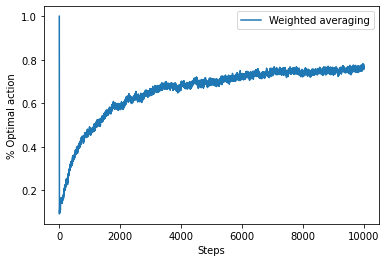

In [ ]:
average_run_optimality = np.average(optimal_selections[1], axis=0)
average_run_optimality.shape
plt.plot(average_run_optimality, label='Weighted averaging')
plt.legend()
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.show()